# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [4]:
import pandas as pd

# Memuat dataset
file_path = '../data/Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris awal dari dataset
print("Beberapa baris awal dari dataset:")
print(data.head())

# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", data.shape)

# Memastikan dataset tidak memiliki label
if 'label' in data.columns:
    print("Dataset memiliki label, silakan pilih dataset lain.")
else:
    print("Dataset tidak memiliki label. Melanjutkan analisis...")


Beberapa baris awal dari dataset:
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                       

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer   

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Pastikan dataset telah dimuat dengan benar
print("Kolom dalam dataset:")
print(data.columns)

Kolom dalam dataset:
Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom dalam dataset: (5000, 20)

Tipe data tiap kolom:
Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object

Data yang hilang:
Employee_ID    

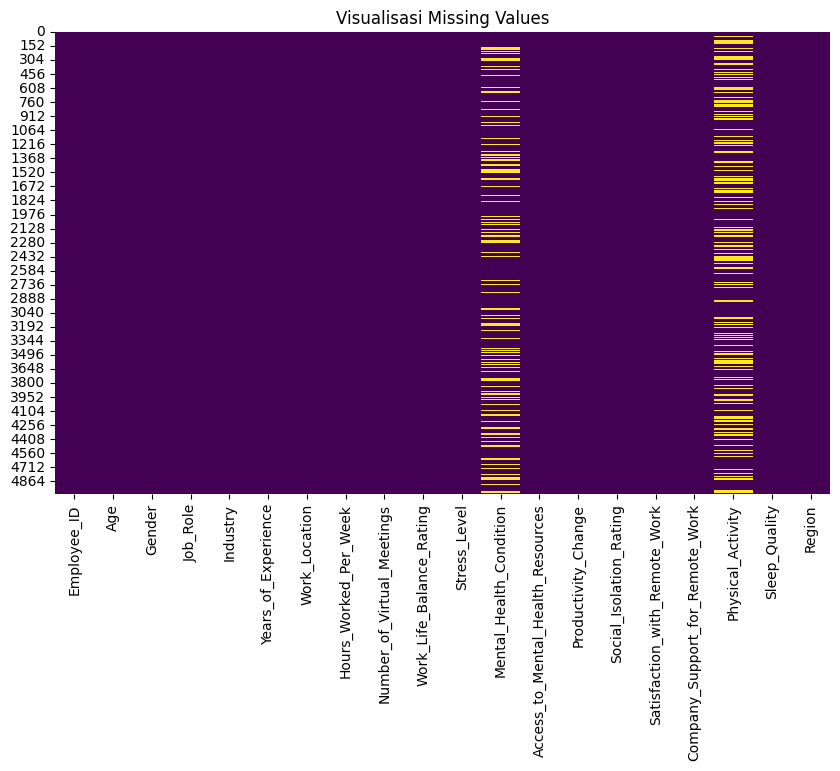


Statistik Deskriptif untuk Variabel Numerik:
               Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  5000.000000          5000.000000            5000.000000   
mean     40.995000            17.810200              39.614600   
std      11.296021            10.020412              11.860194   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              40.000000   
75%      51.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 5000.000000               5000.000000   
mean                     7.559000                  2.984200   
std                      4.636121                  1.410513   
min                      0.000000                  1.000000   
25%                      4.000000           

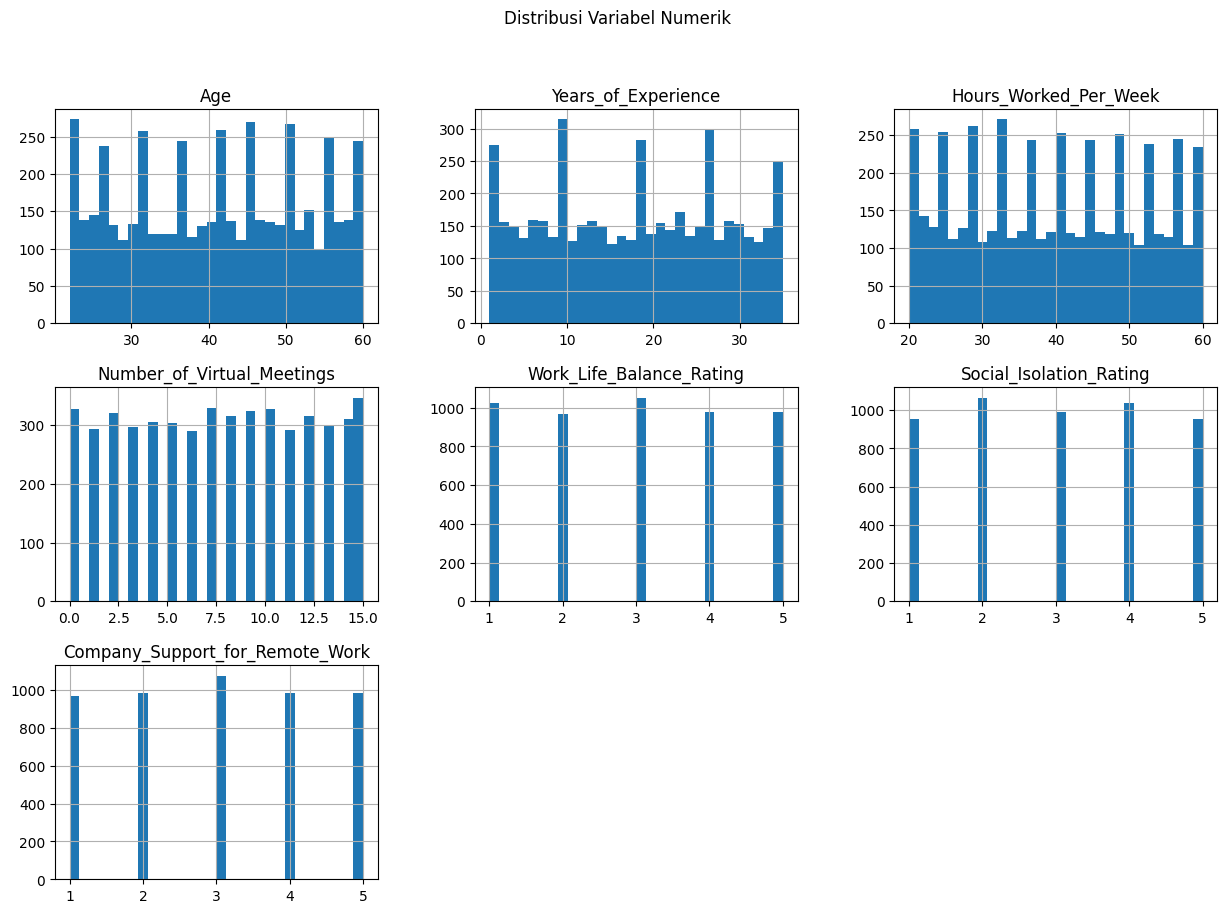

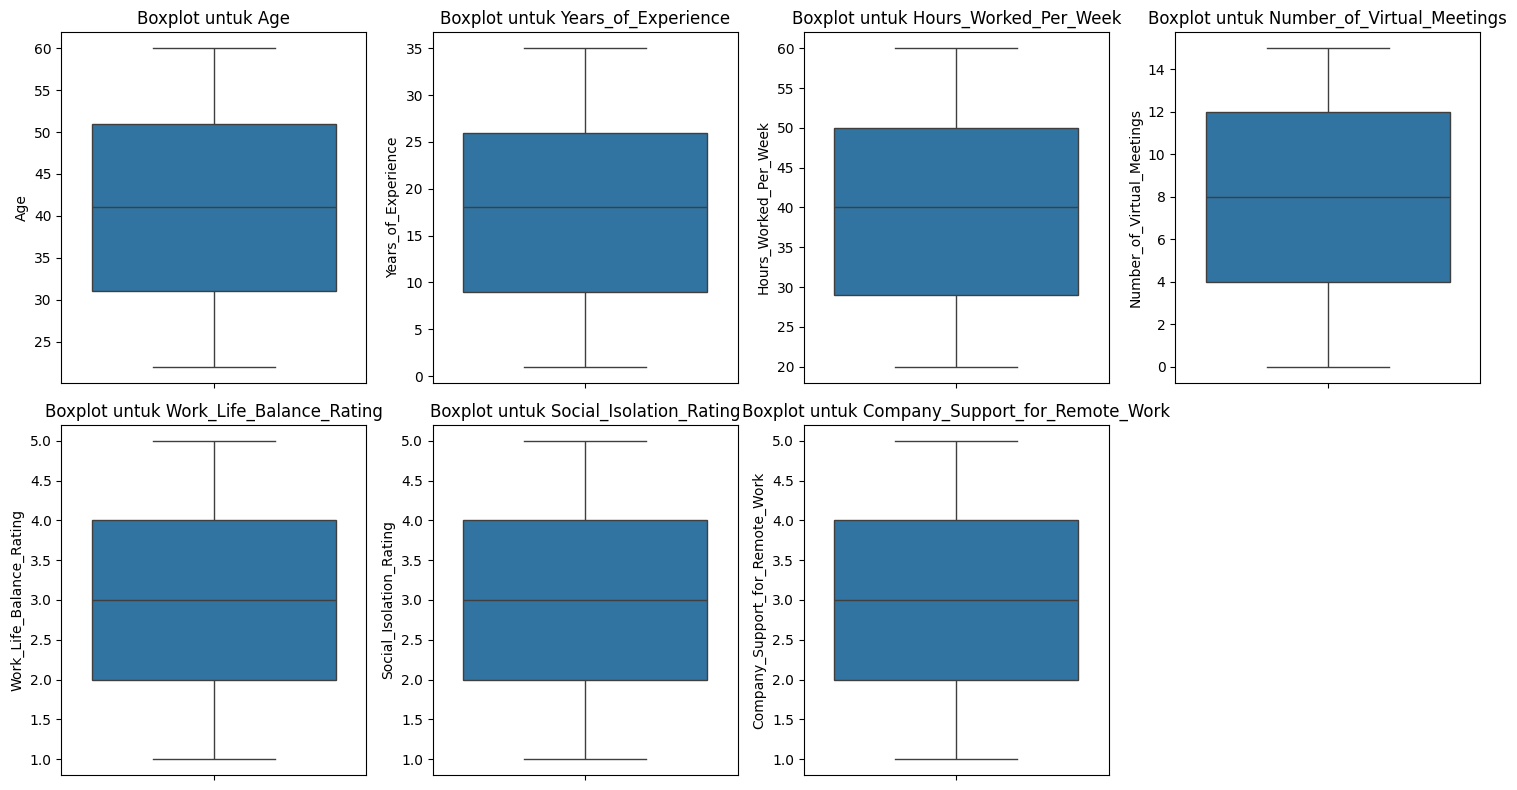

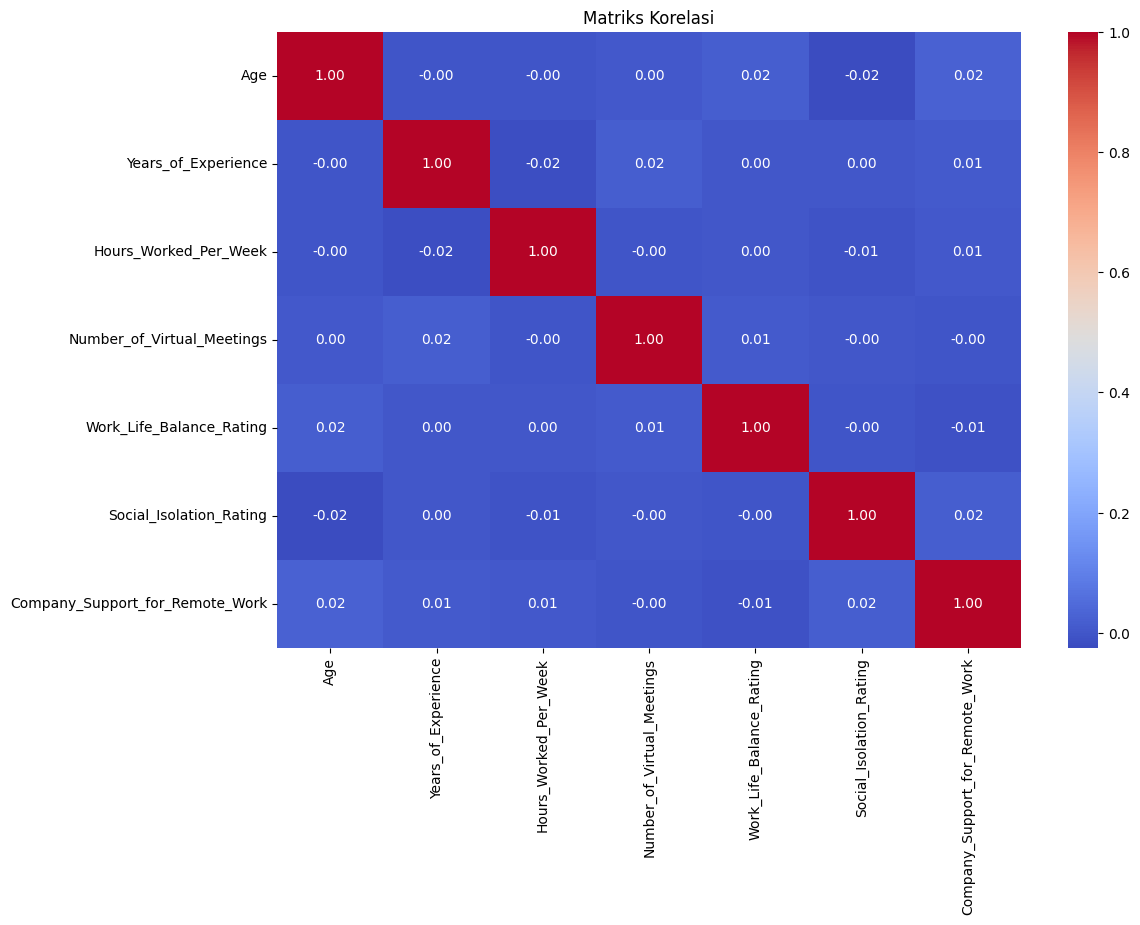

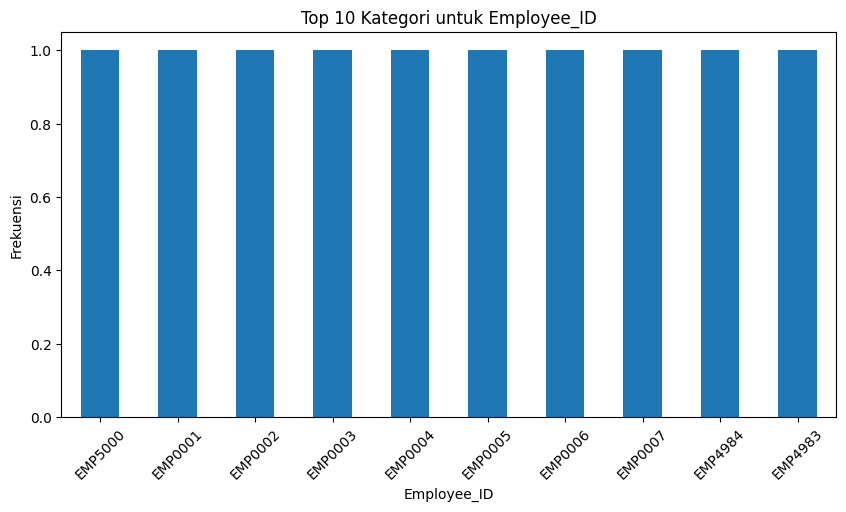

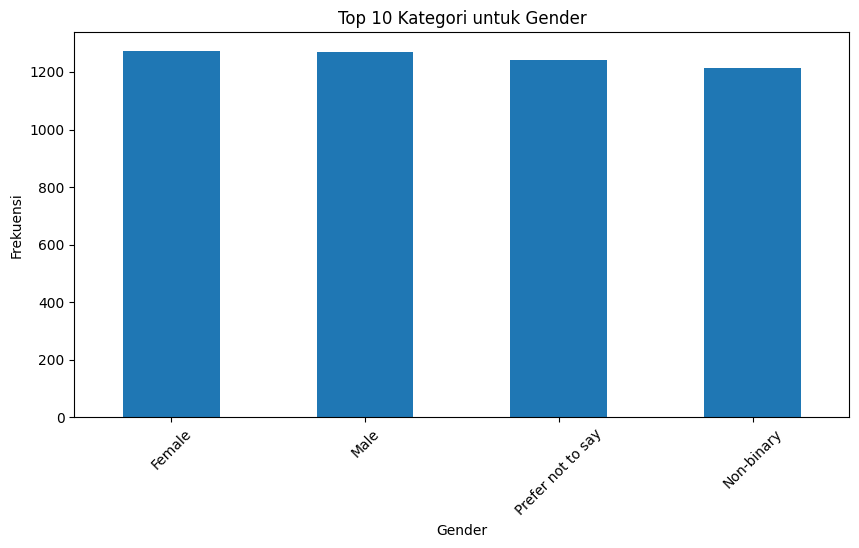

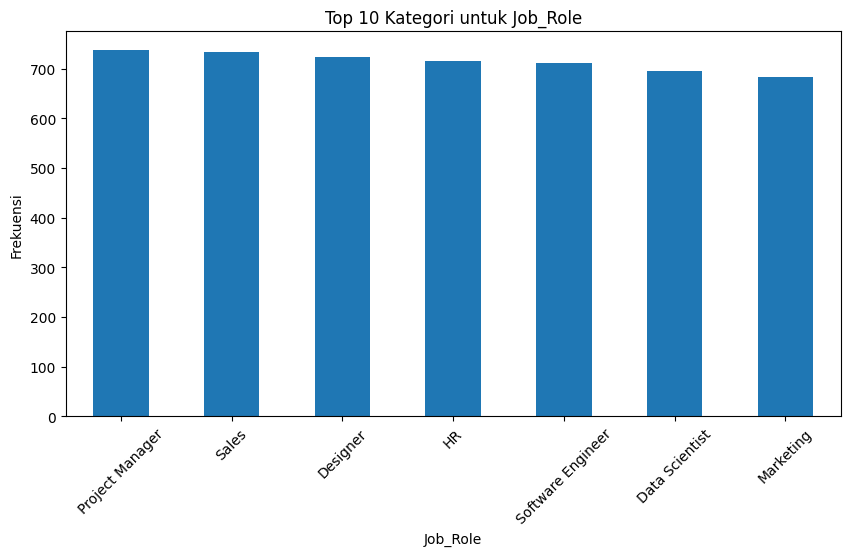

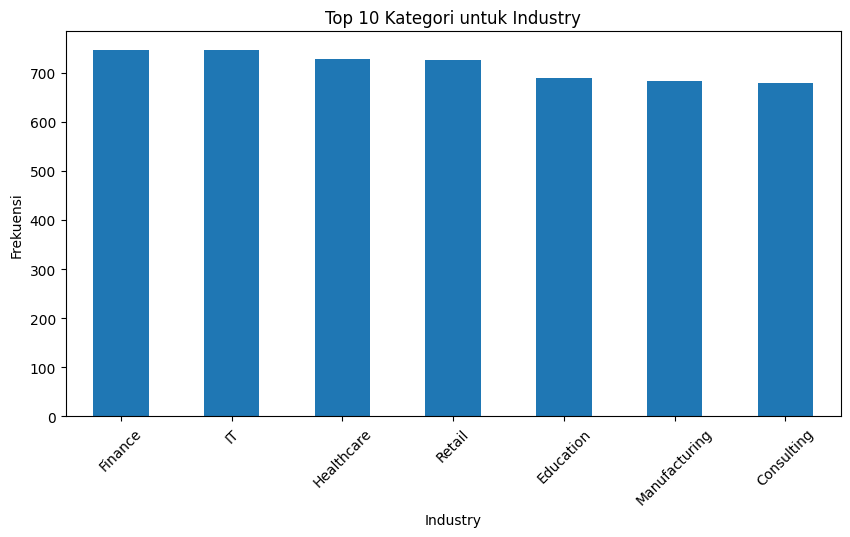

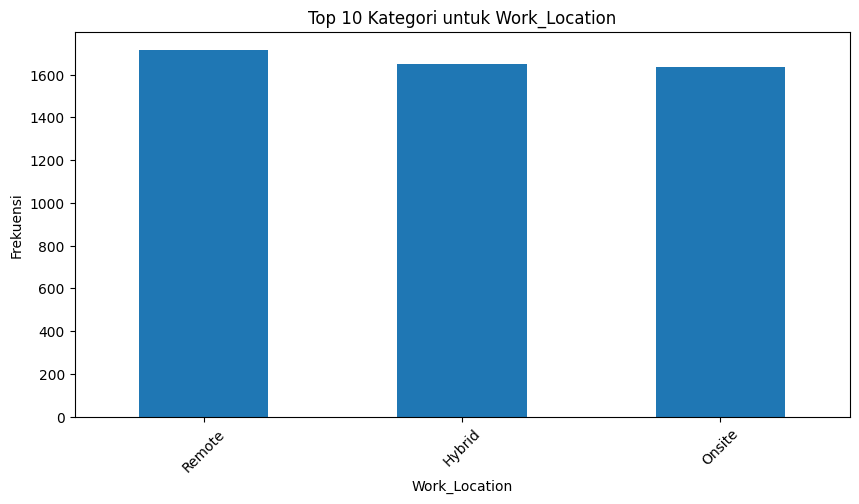

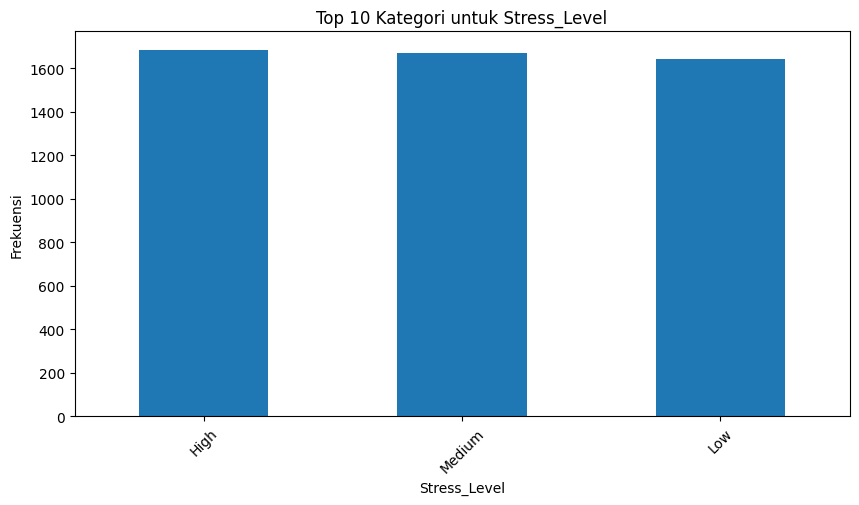

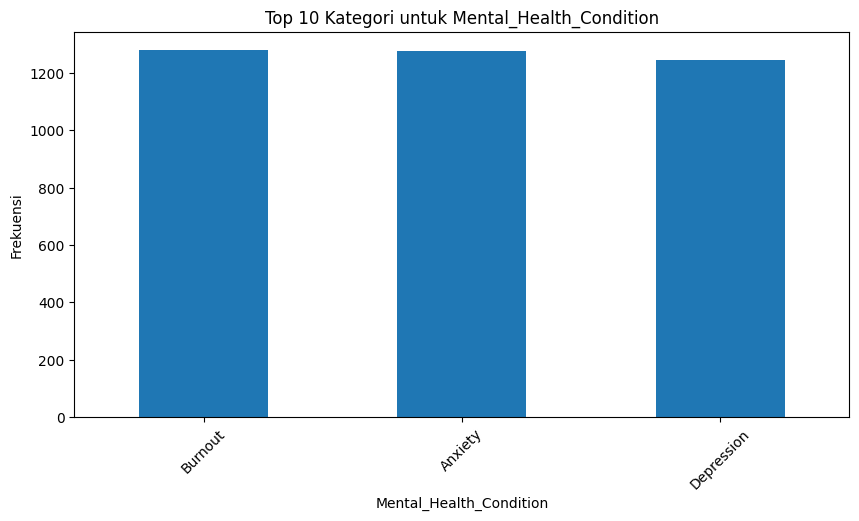

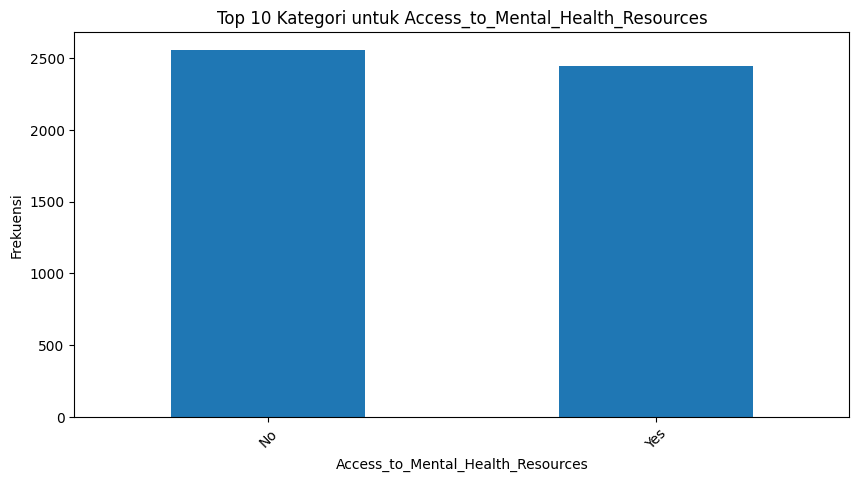

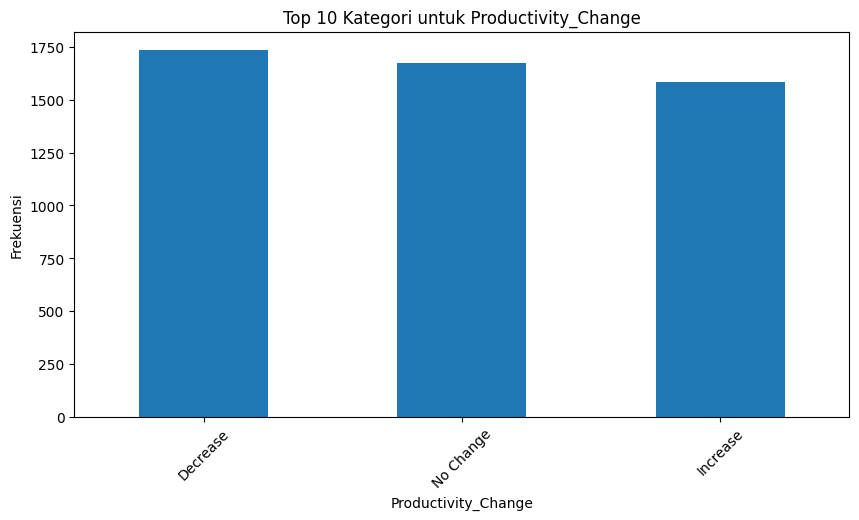

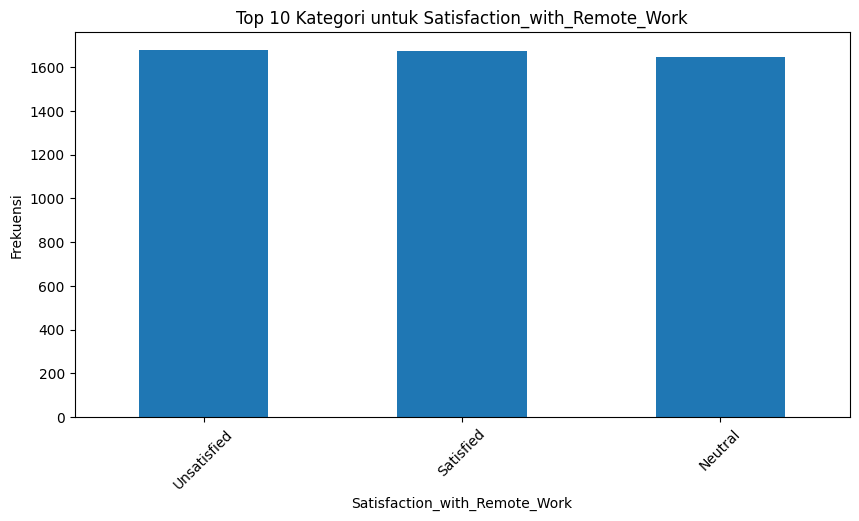

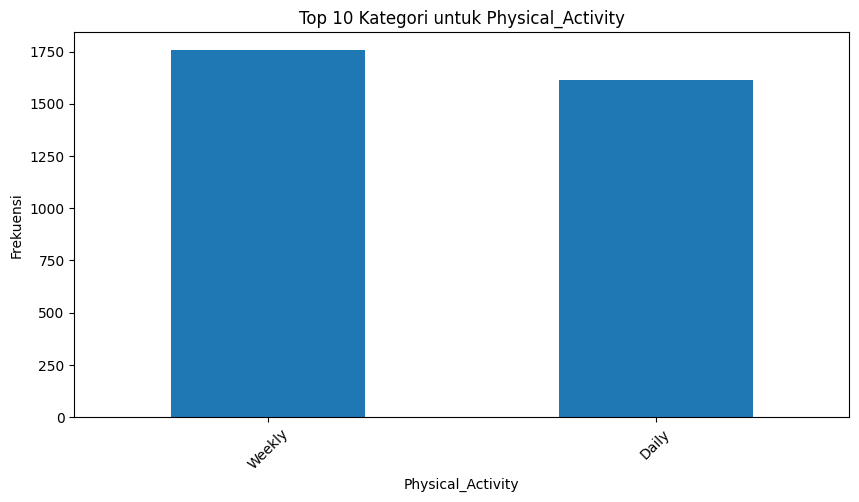

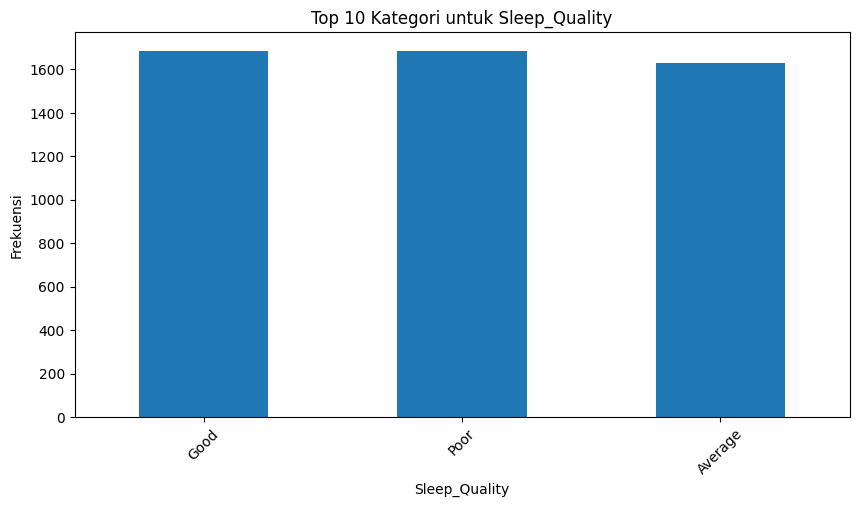

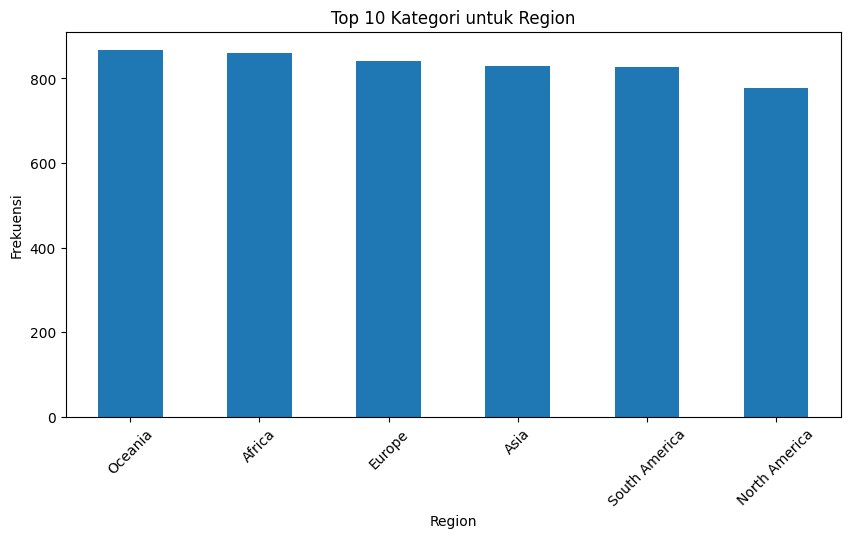

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
file_path = '../data/Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv(file_path)

# **1. Memahami Struktur Data**
print("Jumlah baris dan kolom dalam dataset:", data.shape)
print("\nTipe data tiap kolom:")
print(data.dtypes)

# **2. Menangani Data yang Hilang**
print("\nData yang hilang:")
print(data.isnull().sum())

# Visualisasi data yang hilang
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values')
plt.show()

# **3. Analisis Distribusi dan Korelasi**
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=[object]).columns.tolist()

# Statistik deskriptif untuk variabel numerik
print("\nStatistik Deskriptif untuk Variabel Numerik:")
print(data[numerical_cols].describe())

# Histogram untuk variabel numerik
data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

# Boxplot untuk variabel numerik
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot untuk {col}')
plt.tight_layout()
plt.show()

# Matriks korelasi
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# **4. Visualisasi Data**
# Grafik batang untuk variabel kategorikal
for col in categorical_cols:
    top_categories = data[col].value_counts().head(10)  # Ambil 10 kategori teratas
    top_categories.plot(kind='bar', figsize=(10, 5), title=f'Top 10 Kategori untuk {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)  # Memutar label x-axis agar lebih terbaca
    plt.show()

# Pairplot untuk variabel numerik (jika jumlah kolom numerik tidak terlalu banyak)
if len(numerical_cols) <= 6:  # Misalnya, hanya tampilkan jika <= 6 kolom
    sns.pairplot(data[numerical_cols])
    plt.title('Pairplot untuk Variabel Numerik')
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings

# Memuat dataset dari file CSV
file_path = '../data/Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv(file_path)

# Mengabaikan peringatan terkait pengubahan DataFrame
warnings.filterwarnings("ignore")

# Mengatasi data kosong (missing values)
# Mengisi nilai yang hilang pada kolom kategorikal dengan modus
for col in data.select_dtypes(include=[object]).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Mengisi nilai yang hilang pada kolom numerik dengan median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Menghapus data duplikat
data.drop_duplicates(inplace=True)

# Normalisasi atau standarisasi fitur
# Mengidentifikasi kolom numerik untuk distandarisasi
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Menerapkan standardisasi pada fitur numerik
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Deteksi dan penanganan outlier
# Menggunakan Interquartile Range (IQR) untuk mendeteksi outlier
Q1 = data[numeric_features].quantile(0.25)
Q3 = data[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier dari dataset
for col in numeric_features:
    data = data[(data[col] >= lower_bound[col]) & (data[col] <= upper_bound[col])]

# Encoding data kategorikal
# Mengonversi kolom kategorikal menjadi variabel dummy
categorical_features = data.select_dtypes(include=[object]).columns.tolist()
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Binning (pengelompokan data)
# Mengelompokkan data usia menjadi kategori
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
data['Age_Binned'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Menampilkan hasil akhir setelah preprocessing
print("Dataset setelah preprocessing:")
print(data.head())


Dataset setelah preprocessing:
        Age  Years_of_Experience  Hours_Worked_Per_Week  \
0 -0.796378            -0.480088               0.622767   
1 -0.088093            -1.478151               1.044388   
2  1.594083             0.418168               0.538443   
3 -1.239056             0.218556              -0.642094   
4  0.708727             1.416231              -0.389122   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
0                   -0.120587                 -0.697830   
1                   -0.767744                 -1.406862   
2                    0.742290                  1.429268   
3                    0.095132                  0.720235   
4                    0.958009                 -0.697830   

   Social_Isolation_Rating  Company_Support_for_Remote_Work  \
0                -1.429785                        -1.435264   
1                 0.004446                        -0.720420   
2                 0.721562                         1.424112   
3      

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

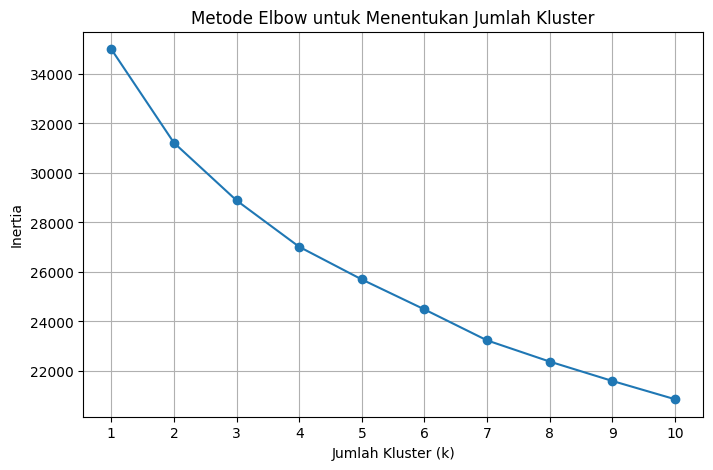

Dataset setelah clustering:
        Age  Years_of_Experience  Hours_Worked_Per_Week  \
0 -0.796378            -0.480088               0.622767   
1 -0.088093            -1.478151               1.044388   
2  1.594083             0.418168               0.538443   
3 -1.239056             0.218556              -0.642094   
4  0.708727             1.416231              -0.389122   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
0                   -0.120587                 -0.697830   
1                   -0.767744                 -1.406862   
2                    0.742290                  1.429268   
3                    0.095132                  0.720235   
4                    0.958009                 -0.697830   

   Social_Isolation_Rating  Company_Support_for_Remote_Work  \
0                -1.429785                        -1.435264   
1                 0.004446                        -0.720420   
2                 0.721562                         1.424112   
3         

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Memilih jumlah kluster (k)
# Anda bisa menggunakan metode Elbow untuk menentukan jumlah kluster yang optimal
inertia = []
k_values = range(1, 11)  # Mencoba k dari 1 hingga 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[numeric_features])  # Menggunakan fitur numerik untuk clustering
    inertia.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

# Memilih jumlah kluster (k) berdasarkan hasil visualisasi (misal k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Melatih model dengan data
kmeans.fit(data[numeric_features])

# Menambahkan label kluster ke dataset
data['Cluster_Label'] = kmeans.labels_

# Menampilkan hasil akhir dengan label kluster
print("Dataset setelah clustering:")
print(data.head())


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

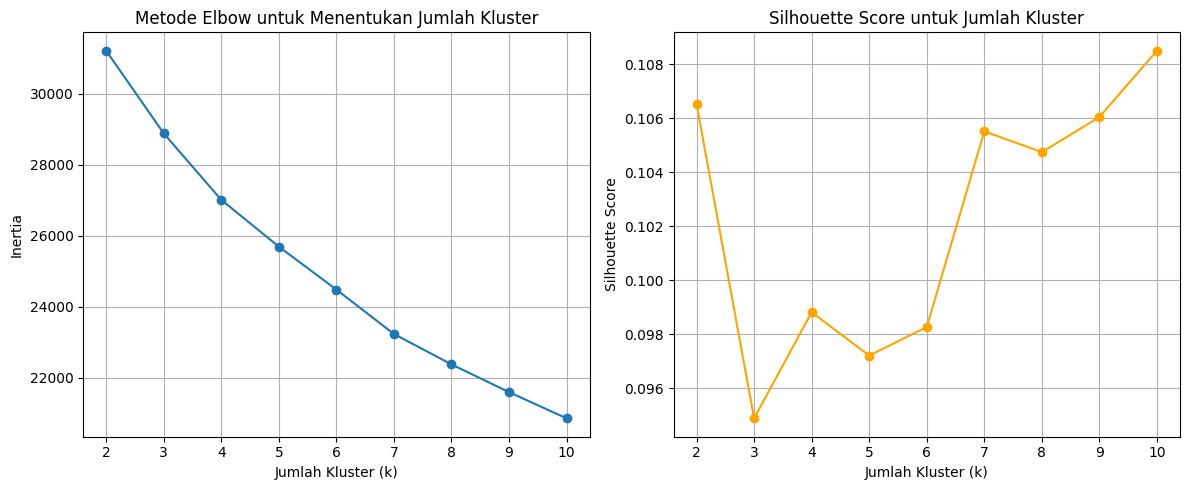

Jumlah kluster: 2, Silhouette Score: 0.1065
Jumlah kluster: 3, Silhouette Score: 0.0949
Jumlah kluster: 4, Silhouette Score: 0.0988
Jumlah kluster: 5, Silhouette Score: 0.0972
Jumlah kluster: 6, Silhouette Score: 0.0983
Jumlah kluster: 7, Silhouette Score: 0.1055
Jumlah kluster: 8, Silhouette Score: 0.1047
Jumlah kluster: 9, Silhouette Score: 0.1060
Jumlah kluster: 10, Silhouette Score: 0.1085


In [17]:
from sklearn.metrics import silhouette_score

# Metode Elbow
inertia = []
k_values = range(2, 11)  # Mencoba k dari 2 hingga 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[numeric_features])  # Menggunakan fitur numerik untuk clustering
    inertia.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

# Menghitung Silhouette Score
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data[numeric_features])
    silhouette_avg = silhouette_score(data[numeric_features], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualisasi Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score untuk Jumlah Kluster')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

# Menampilkan nilai Silhouette Score
for k, score in zip(k_values, silhouette_scores):
    print(f'Jumlah kluster: {k}, Silhouette Score: {score:.4f}')


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Memuat dataset
file_path = '../data/Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv(file_path)

# Preprocessing data (misalnya, mengisi missing values dan normalisasi)
for col in data.select_dtypes(include=[object]).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

data.drop_duplicates(inplace=True)

# Normalisasi fitur numerik
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Memisahkan fitur dan target
X = data[numeric_features]  
y = data['Mental_Health_Condition']  

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan Random Forest untuk feature selection
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Mendapatkan pentingnya fitur
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

# Memilih fitur dengan skor lebih dari threshold tertentu
selected_features = feature_importance[feature_importance > 0.05].index.tolist()
X_selected = X[selected_features]

# Membangun model clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X_selected)

# Menghitung Silhouette Score untuk model dengan fitur terpilih
silhouette_avg = silhouette_score(X_selected, kmeans.labels_)
print(f'Silhouette Score untuk model dengan fitur terpilih: {silhouette_avg}')

# Membangun model clustering dengan semua fitur
kmeans_all = KMeans(n_clusters=3, random_state=42)
kmeans_all.fit(X)

# Menghitung Silhouette Score untuk model dengan semua fitur
silhouette_avg_all = silhouette_score(X, kmeans_all.labels_)
print(f'Silhouette Score untuk model dengan semua fitur: {silhouette_avg_all}')

# Membandingkan hasil
if silhouette_avg > silhouette_avg_all:
    print("Model dengan fitur terpilih lebih baik.")
else:
    print("Model dengan semua fitur lebih baik.")


Silhouette Score untuk model dengan fitur terpilih: 0.09489154239350173
Silhouette Score untuk model dengan semua fitur: 0.09489154239350173
Model dengan semua fitur lebih baik.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

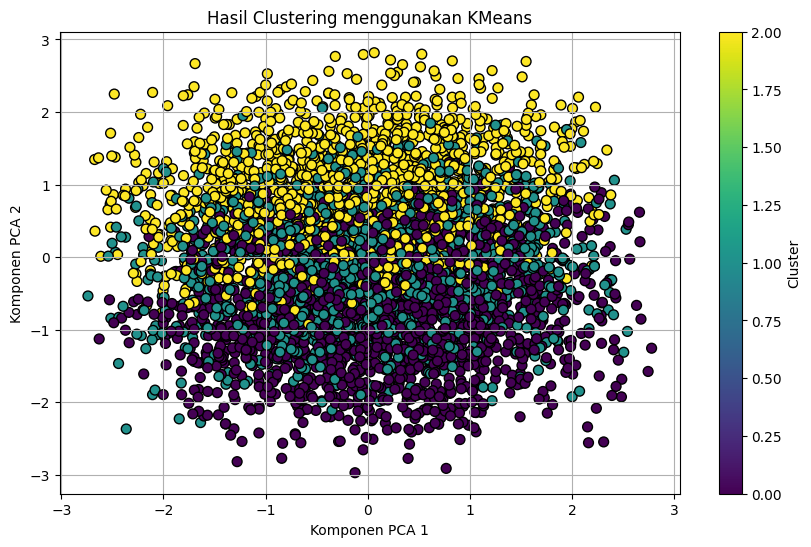

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Memuat dataset
file_path = '../data/Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv(file_path)

# Preprocessing data (mengisi missing values dan normalisasi)
for col in data.select_dtypes(include=[object]).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

data.drop_duplicates(inplace=True)

# Normalisasi fitur numerik
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Memisahkan fitur
X = data[numeric_features]

# Membangun model clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X)

# Menambahkan label cluster ke DataFrame
data['Cluster'] = kmeans.labels_

# Menggunakan PCA untuk proyeksi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hasil Clustering menggunakan KMeans')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Analisis Karakteristik Tiap Cluster:
              Age                           Years_of_Experience            \
             mean    median count       std                mean    median   
Cluster                                                                     
0        0.004620  0.088978  1738  1.002580           -0.021427  0.018943   
1       -0.022125  0.000443  1428  0.998412            0.006223  0.018943   
2        0.012849  0.000443  1834  0.999322            0.015460  0.018943   

                        Hours_Worked_Per_Week                            \
        count       std                  mean    median count       std   
Cluster                                                                   
0        1738  0.988266              0.045695  0.032499  1738  1.006818   
1        1428  1.005924             -0.030686 -0.051826  1428  0.997847   
2        1834  1.006871             -0.019411 -0.051826  1834  0.994449   

        Number_of_Virtual_Meetings               

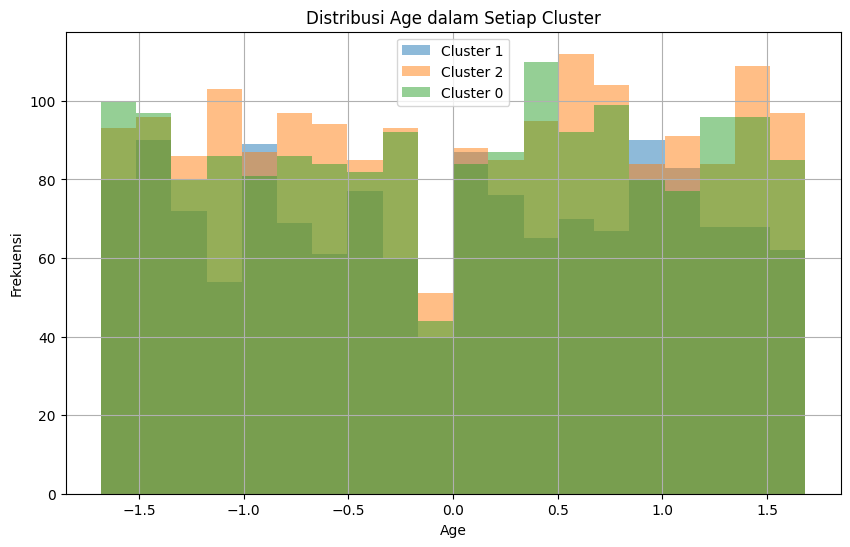

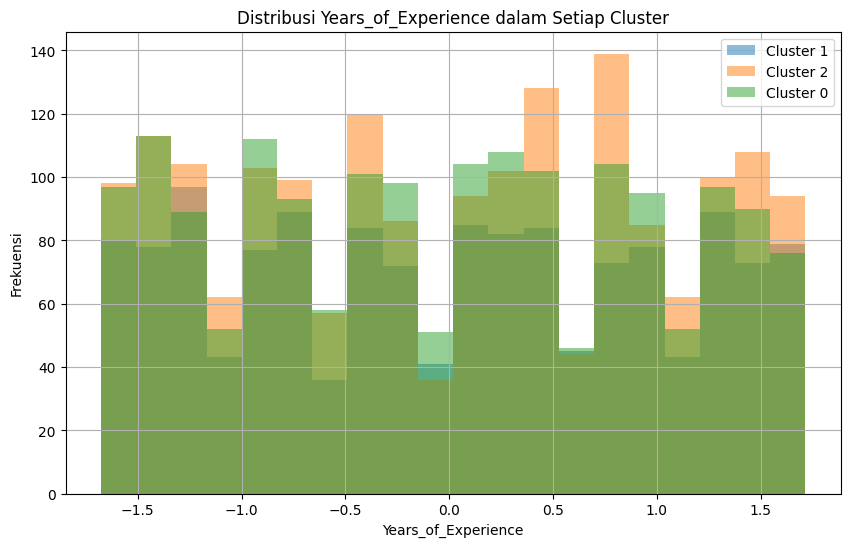

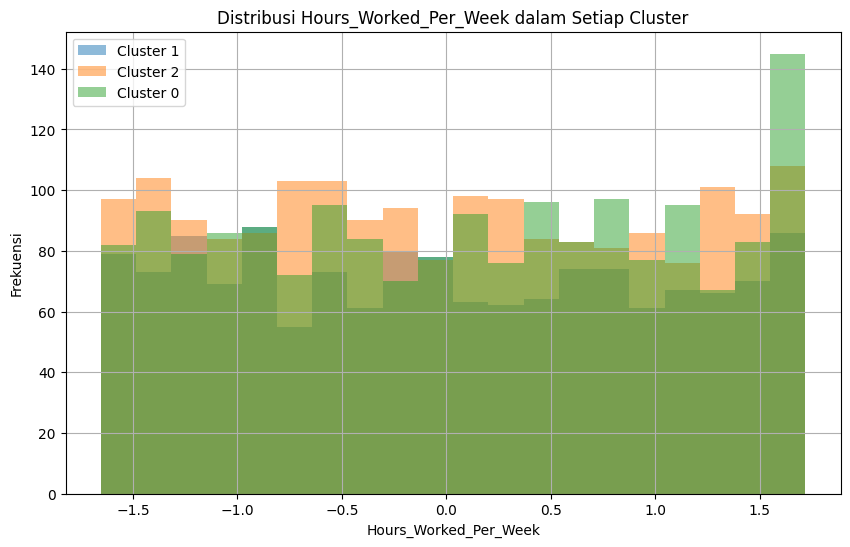

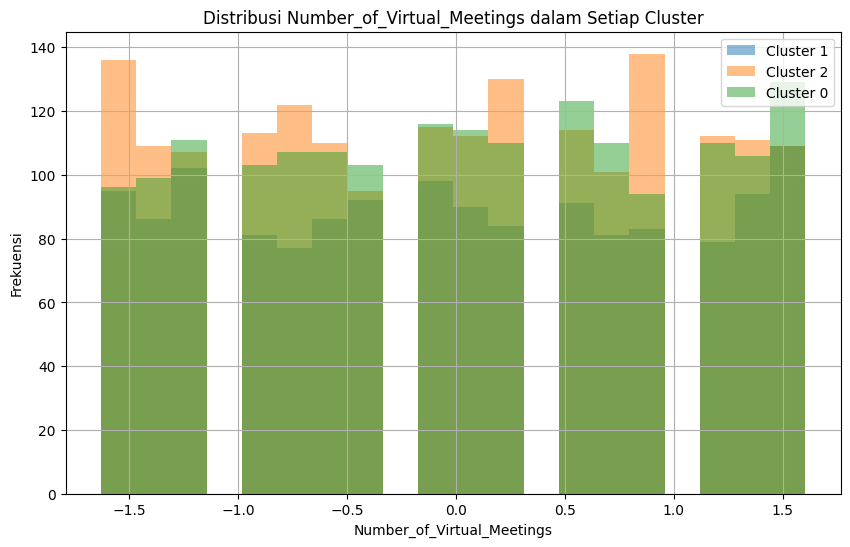

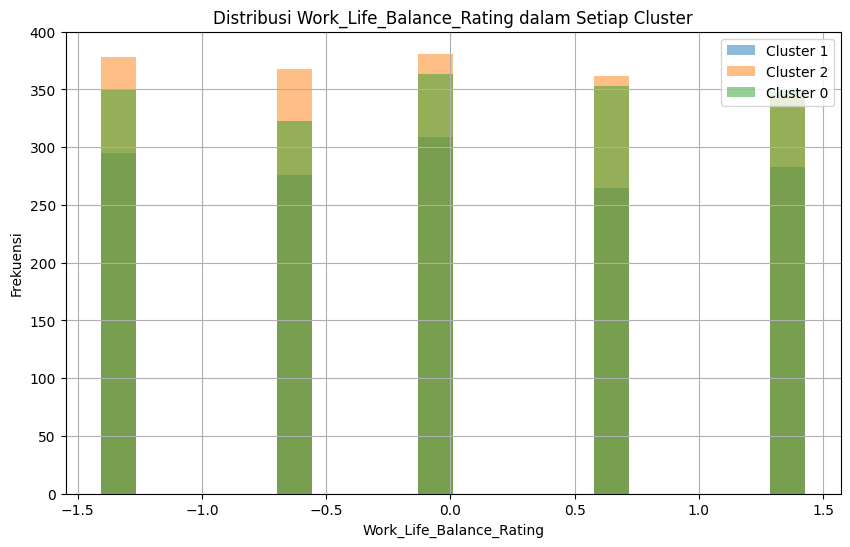

Cluster 0:
 - Rata-rata Usia: 0.00
 - Data tingkat stres tidak tersedia.
----
Cluster 1:
 - Rata-rata Usia: -0.02
 - Data tingkat stres tidak tersedia.
----
Cluster 2:
 - Rata-rata Usia: 0.01
 - Data tingkat stres tidak tersedia.
----
Data tingkat stres tidak tersedia untuk rekomendasi.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Misalkan Anda sudah memiliki DataFrame 'data'
# Mengonversi kolom kategorikal menjadi numerik
categorical_features = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 
                        'Stress_Level', 'Mental_Health_Condition', 
                        'Access_to_Mental_Health_Resources', 
                        'Satisfaction_with_Remote_Work', 
                        'Company_Support_for_Remote_Work', 'Region']

# Menggunakan Label Encoding untuk kolom kategorikal
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Daftar fitur numerik yang ingin dianalisis
numeric_features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 
                    'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating']

# Menggabungkan fitur numerik dengan fitur yang sudah di-encode
all_features = numeric_features + categorical_features

# Melakukan KMeans clustering
num_clusters = 3  # Ganti dengan jumlah cluster yang sesuai
kmeans = KMeans(n_clusters=num_clusters)
data['Cluster'] = kmeans.fit_predict(data[all_features])

# 1. Menghitung Statistik Deskriptif untuk Setiap Cluster
# Hanya menggunakan fitur numerik untuk analisis
cluster_analysis = data.groupby('Cluster')[numeric_features].agg(['mean', 'median', 'count', 'std'])
print("Analisis Karakteristik Tiap Cluster:")
print(cluster_analysis)

# 2. Visualisasi Distribusi Fitur
for col in numeric_features:
    plt.figure(figsize=(10, 6))
    for cluster in data['Cluster'].unique():
        subset = data[data['Cluster'] == cluster]
        plt.hist(subset[col], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribusi {col} dalam Setiap Cluster')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid()
    plt.show()

# 3. Interpretasi Hasil
def interpret_clusters(cluster_analysis):
    for cluster in cluster_analysis.index:
        mean_age = cluster_analysis.loc[cluster, ('Age', 'mean')]
        # Pastikan untuk memeriksa apakah 'Stress_Level' ada dalam analisis
        if 'Stress_Level' in cluster_analysis.columns.get_level_values(0):
            mean_stress = cluster_analysis.loc[cluster, ('Stress_Level', 'mean')]
            print(f"Cluster {cluster}:")
            print(f" - Rata-rata Usia: {mean_age:.2f}")
            print(f" - Rata-rata Tingkat Stres: {mean_stress:.2f}")
        else:
            print(f"Cluster {cluster}:")
            print(f" - Rata-rata Usia: {mean_age:.2f}")
            print(" - Data tingkat stres tidak tersedia.")
        print("----")

interpret_clusters(cluster_analysis)

# 4. Rekomendasi Tindakan
def recommend_actions(cluster_analysis):
    if 'Stress_Level' in cluster_analysis.columns.get_level_values(0):
        if cluster_analysis.loc[0, ('Stress_Level', 'mean')] > 3:  # Misalkan 3 adalah tingkat stres yang tinggi
            print("Rekomendasi: Tingkatkan dukungan kesehatan mental untuk Cluster 0.")
    else:
        print("Data tingkat stres tidak tersedia untuk rekomendasi.")

recommend_actions(cluster_analysis)

# Hasil Interpretasi Clustering

## Analisis Karakteristik Tiap Cluster

Tabel berikut menunjukkan statistik deskriptif untuk setiap cluster berdasarkan fitur-fitur numerik:

| Cluster | Rata-rata Usia | Rata-rata Pengalaman Kerja | Rata-rata Jam Kerja per Minggu | Rata-rata Jumlah Pertemuan Virtual | Rata-rata Penilaian Keseimbangan Kerja-Hidup |
|---------|----------------|----------------------------|----------------------------------|------------------------------------|------------------------------------------------|
| 0       | 0.00           | -0.0214                    | 0.0457                           | 0.0254                             | 0.0226                                         |
| 1       | -0.02          | 0.0062                     | -0.0307                          | -0.0052                            | -0.0062                                       |
| 2       | 0.01           | 0.0155                     | -0.0194                          | -0.0200                            | -0.0166                                       |

## Interpretasi

- **Cluster 0**:
  - Rata-rata usia adalah 0.00.
  - Data tingkat stres tidak tersedia.

- **Cluster 1**:
  - Rata-rata usia adalah -0.02.
  - Data tingkat stres tidak tersedia.

- **Cluster 2**:
  - Rata-rata usia adalah 0.01.
  - Data tingkat stres tidak tersedia.

## Rekomendasi

Data tingkat stres tidak tersedia untuk memberikan rekomendasi lebih lanjut. Untuk analisis mendatang, disarankan untuk memastikan semua fitur yang relevan, termasuk tingkat stres, dimasukkan dalam analisis clustering agar dapat memberikan wawasan yang lebih komprehensif dan rekomendasi yang lebih tepat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
# Menyimpan DataFrame dengan hasil clustering ke dalam file CSV
data.to_csv('../data/hasil_clustering.csv', index=False)

print("Data berhasil disimpan ke 'data/hasil_clustering.csv'")

Data berhasil disimpan ke 'data/hasil_clustering.csv'
